# Testiranje parametarskih hipoteza
## konstrukcijom odgovarajućih intervala poverenja

In [1]:
from scipy import stats
import matplotlib.pyplot as plt
import numpy as np

m=5
sigma=3

broj_uzoraka = 50 # broj uzoraka za racunanje jedne aritmeticke sredine (srednje vrednosti)

xs= stats.norm.rvs(size=broj_uzoraka,loc=m,scale=sigma) # uzorci iz normalne raspodele
aritmeticka_sredina = np.mean(xs) # uzorci aritmetickih sredina 
aritmeticka_sredina

4.5626798051624577

In [2]:
# Testiracemo hipotezu da je matematicko ocekivanje E(X)=5 (H0), dok je H1: E(X) razlicito od 5
# Formiramo dvostrani interval poverenja (pretpostavljamo da ne znamo varijansu):

# ocena standardne devijacije:
s = np.std(xs,ddof=1) # uzorci ocena std. dev. 

alpha=0.05   # nivo poverenja je 1-alpha=0.95

interval_poverenja=stats.t.interval(1-alpha,df=broj_uzoraka-1,loc=aritmeticka_sredina, scale=s/broj_uzoraka**0.5)
aritmeticka_sredina, interval_poverenja

(4.5626798051624577, (3.7424298227005375, 5.382929787624378))

Ako interval poverenja obuhvata tacku 5, ne mozemo da odbacimo $H_0$ hipotezu sa nivoom znacajnosti $\alpha$

In [19]:
# menjanem alpha dobijamo p-vrednost (vrednost alpha za koju je granica intervala jednaka 5):

alpha=0.28  # nivo poverenja je 1-alpha

interval_poverenja=stats.t.interval(1-alpha,df=broj_uzoraka-1,loc=aritmeticka_sredina, scale=s/broj_uzoraka**0.5)
interval_poverenja

(4.1167946767754779, 5.0085649335494375)

In [4]:
# direktno odredjivanje p-vrednosti (inverzno od racunanja intervala poverenja):

margina=np.abs(aritmeticka_sredina-5)
Kvantil=margina*(broj_uzoraka**0.5/s)

p_vrednost=2*(1-stats.t.cdf(Kvantil,df=broj_uzoraka-1))
    
p_vrednost

0.28923197776053633

In [5]:
#ako je p vrednost date statistike relativno visoka (npr veca od 0.1) - prilicno smo sigurni da necemo odbaciti hipotezu H0

### Vezbanje 1: na isti nacin odrediti p-vrednost statistike kod testiranja varijanse (H0: Var=9, H1: Var razlicito od 9)

### Vezbanje 2: Ucitati podatke o temperaturi iz fajla temeprature.csv, izabrati grad, estimirati matematicko ocekivanje temperatura, i odrediti p-vrednosti kod odgovarajucih testova hipoteza

# Testiranje neparametarskih hipoteza o raspodeli

## Hi-kvadrat test

In [6]:
# scipy.stats.chisquare(f_obs, f_exp=None, ddof=0)
# f_obs su posmatrane frekvencije na svakom intervalu, f_exp su ocekivane, 
# ddof je broj parametara koje smo morali da ocenimo iz uzorka

stats.chisquare([16, 18, 16, 14, 12, 12])  # ako se ne specificira f_exp pretpostavlja se uniformna raspodela

Power_divergenceResult(statistic=2.0, pvalue=0.84914503608460956)

In [7]:
# prilicno smo sigurni da necemo odbaciti hipotezu da je dati uzorak iz uniformne raspodele

## Test Kolmogorova i Smirnova

In [8]:
from scipy import stats
import numpy as np

# testiramo da li su tacke dobijene pomocu np.linspace() dobijene iz normalne raspodele: 
x = np.linspace(-15, 15, 9)
stats.kstest(x, 'norm')  # funkcija ktest vraca odgovarajucu statistiku (lambda iz predavanja) kao i njenu p-vrednost

KstestResult(statistic=0.44435602715924361, pvalue=0.038850142705171065)

In [9]:
# dakle, p-vrednost je jako mala sto znaci da hipotezu da je F=F_0 odbacujemo sa nivoom znacajnosti 0.04
# - 96% smo sigurni u alternativu

In [20]:
# testiramo uzorka iz normalne raspodele da li su stvarno iz te raspodele:

stats.kstest(stats.norm.rvs(size=100), 'norm')

KstestResult(statistic=0.059555028855678926, pvalue=0.87011928369720448)

In [11]:
# visoka je p-vrednost sto znaci da hipotezu F=F_0 odbacujemo samo ako dozvolimo veliku verovatnocu greske prve vrste!

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

grad='Detroit'
atributi = [grad]
df = pd.read_csv("temperature.csv",usecols=atributi)
df.head()

Detroit
0         NaN
1  284.030000
2  284.069789
3  284.173965
4  284.278140

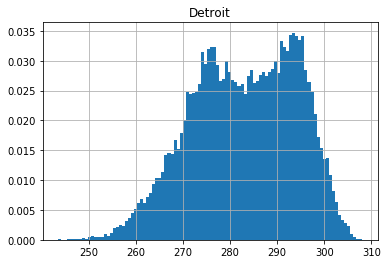

In [13]:
#histogram
hist = df.hist(normed=True,bins=100) 
plt.show()

In [14]:
# testiracemo da li je ovo normalna raspodele:

velicina_uzorka=100

stats.kstest(df.sample(velicina_uzorka).dropna().values.T, cdf='norm',args=(df.dropna().values.mean(), df.dropna().values.std()))  
# u args stavljamo ocene matematickog ocekivanja i standardne devijacije

KstestResult(statistic=0.98699448283609792, pvalue=0.026011034327804161)

In [15]:
# p-vrednost je prilicno mala - sa nivoom znacajnosti oko pvalue+ odbacujemo hipotezu o normalnoj raspodeli

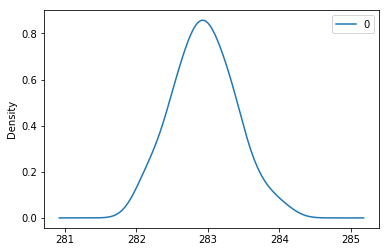

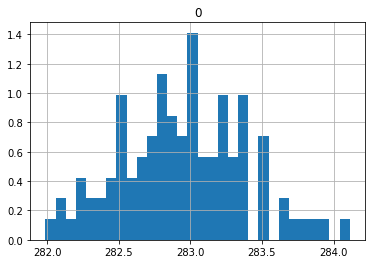

In [16]:
# Tesitramo raspodelu estimatora srednje vrednosti

estimatori_srednje_vrednosti = []       

velicina_uzorka=500
broj_estimacija_srednjih_vrednosti=100   # ovo je broj estimacija, svaki je baziran na uzorku velicine 'velicina_uzorka'
for x in range(broj_estimacija_srednjih_vrednosti):
    
    uzorak=df.sample(velicina_uzorka)
    estimatori_srednje_vrednosti.append( uzorak.dropna().values.mean() )
    
    # ili:
    #uzorak = np.random.choice(a= df.values, size=velicina_uzorka)
    #estimatori_srednje_vrednosti.append( uzorak.mean() )
    
# plotujemo estimaciju gustine verovatnoce raspodele srednjih vrednosti (pomocu histograma) - vidimo da je priblizno normalna!  
pd.DataFrame(estimatori_srednje_vrednosti).plot(kind="density")   

# histogram srednjih vrednosti:
hist = pd.DataFrame(estimatori_srednje_vrednosti).hist(normed=True,bins=30) 
plt.show()

In [17]:
# testiracemo da li estimatori imaju normalnu raspodelu:

stats.kstest(estimatori_srednje_vrednosti, cdf='norm',args=(df.dropna().values.mean(), df.dropna().values.std()/velicina_uzorka**0.5))

KstestResult(statistic=0.072862836787464635, pvalue=0.65958902554650845)

In [18]:
# prilicno je sigurno da jeste normalna raspodela (sto sledi iz CGT)!